<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/SMS_Spam_NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive\ \(1\).zip

Archive:  archive (1).zip
  inflating: spam.csv                


In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords


extract the relevant data for preprocessing


In [6]:
import pandas as pd

# Try reading the file with a different encoding (ISO-8859-1 or latin1)
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


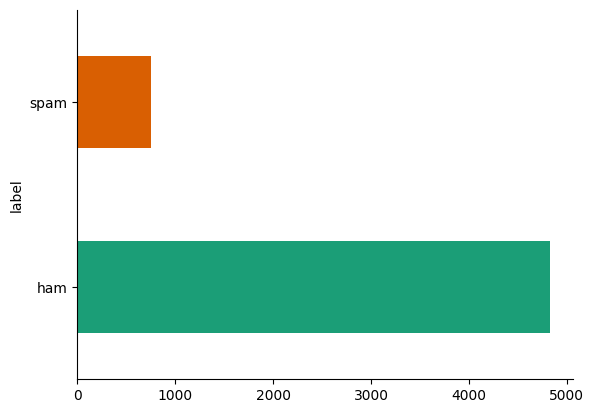

In [9]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df = df[['v2', 'v1']]
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [11]:
df.isnull().sum()

,0
messages,0
label,0


In [13]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^0-9a-zA-Z]', '', text)
  text = re.sub(r'\s+', '', text)
  text = " ".join(word for word in text.split() if word not in STOPWORDS)
  return text

In [16]:
df['clean_text'] = df['messages'].apply(clean_text)
df.head()


,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,gountiljurongpointcrazyavailableonlyinbugisngr...
1,Ok lar... Joking wif u oni...,ham,oklarjokingwifuoni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,freeentryin2awklycomptowinfacupfinaltkts21stma...
3,U dun say so early hor... U c already then say...,ham,udunsaysoearlyhorucalreadythensay
4,"Nah I don't think he goes to usf, he lives aro...",ham,nahidontthinkhegoestousfhelivesaroundherethough


In [17]:
X = df['clean_text']
y = df['label']

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf',TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 86.57573582196699
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1206
        spam       0.00      0.00      0.00       187

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)


Accuracy: 86.71931083991386
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1206
        spam       1.00      0.01      0.02       187

    accuracy                           0.87      1393
   macro avg       0.93      0.51      0.47      1393
weighted avg       0.88      0.87      0.81      1393



In [28]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)


accuracy : 89.52%
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1206
        spam       1.00      0.22      0.36       187

    accuracy                           0.90      1393
   macro avg       0.95      0.61      0.65      1393
weighted avg       0.91      0.90      0.86      1393



In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)


Accuracy: 89.51902368987797
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1206
        spam       1.00      0.22      0.36       187

    accuracy                           0.90      1393
   macro avg       0.95      0.61      0.65      1393
weighted avg       0.91      0.90      0.86      1393

